# Brief intro about the notebook

This notebook is an attempt to vizualize the design data in a better way than chugging it into excel. We noticed that excel couldn't really handle the level of filtration in visualzing the data so we might as well use python to visualize it.

The dataset is a simulation of a supply chain system design that looks at multiple design vectors (architectural desicions) in constructing an autonomous transportation system at MIT.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
design_data = pd.read_csv("designdata.csv")

In [15]:
design_data.columns 

Index(['Design ID', 'Pack Type', 'Chassis', 'Battery Charger',
       'Motor & Inverter', 'Autonomy Level', 'Battery Cost [$]',
       'Chassis Cost [$]', 'Battery Charger Cost [$]',
       'Motor & Inverter  Module Cost [$]', 'Autonomous System Cost [$]',
       'Total Vehicle Cost [$]', 'Total Fleet Size', 'Total Fleet Cost [$]',
       'Average Vehicle Speed [km/h]',
       'Fleet Throughput aka Capacity [passengers/hr]',
       'Average On-Site Wait Time aka Headway [min]',
       'Average Off-Site Wait Time aka Headway [min]',
       'Daily Passenger Volume (passenger trips/day)', 'Availability [dml]',
       'Daily Passenger Volume Utility', 'Avg Wait Time @Kendall Utility',
       'Peak Passenger Throughput Utility', 'Availability Utility',
       'MAU (Weighted Sum)', 'Battery Weight [kg]', 'Chassis Weight [kg]',
       'Battery Charger Weight [kg]', 'Motor & Inverter Module Weight [kg]',
       'Autonomous System Weight [kg]', 'Chassis PAX', 'Passenger Weight [kg]',
       'To

In [10]:
design_data.head(5)

,Design ID,Pack Type,Chassis,Battery Charger,Motor & Inverter,Autonomy Level,Battery Cost [$],Chassis Cost [$],Battery Charger Cost [$],Motor & Inverter Module Cost [$],...,R2 Met? Need 150 Peak Throughput,R3 Met? Need 50 Off-Peak Throughput,R4 Met? Need 5min On-site Wait Time,R5 Met? Need 7min on-site node-to-node transit time,R6 Met? Need 20min Off-site Wait time,Required Freq Met by selected frequency?,R7 Met? Minimum autonomy level for on-site MIT/Kendall Square travel using dedicated lanes,"R8 Met? Minimum autonomy level for off-site MIT/Kendall Square travel (e.g., defined routes or expressways)",R9 Met? Minimum autonomy level for off-site MIT/Kendall Square travel (urban environments),All requirements Met?
0,D1,P1,C1,G1,M1,A1,8000,12000,1000,1200,...,1,1,1,1,1,0,0,0,0,0
1,D2,P1,C1,G1,M1,A2,8000,12000,1000,1200,...,1,1,1,1,1,0,0,0,0,0
2,D3,P1,C1,G1,M1,A3,8000,12000,1000,1200,...,1,1,1,1,1,0,1,0,0,0
3,D4,P1,C1,G1,M1,A4,8000,12000,1000,1200,...,1,1,1,1,1,0,1,1,0,0
4,D5,P1,C1,G1,M1,A5,8000,12000,1000,1200,...,1,1,1,1,1,0,1,1,1,0


# Cleaning up the dataset

There are too many columns. I will shorten the column names first and then select a specific column set to work with a new dataframe

In [22]:
#storing the current column names in a txt file and call it "data_dictionary.txt"
# Open a file
fo = open("data_dictionary.txt", "w+")
fo.write(str(list(design_data.columns)))

# Close opend file
fo.close()

In [75]:
design_data.columns = ['Design ID', 'Pack Type', 'Chassis', 'Battery Charger',
       'Motor & Inverter', 'Autonomy Level', 'Battery Cost',
       'Chassis Cost', 'Battery Charger Cost',
       'M&I Cost', 'Autonomous System Cost',
       'Vehicle Cost [$/vehicle]', 'Total Fleet Size', 'Total Fleet Cost',
       'Average Vehicle Speed [km/h]',
       'Fleet Throughput aka Capacity [passengers/hr]',
       'Average On-Site Wait Time aka Headway [min]',
       'Average Off-Site Wait Time aka Headway [min]',
       'Daily Passenger Volume (passenger trips/day)', 'Availability [dml]',
       'Daily Passenger Volume Utility', 'Avg Wait Time @Kendall Utility',
       'Peak Passenger Throughput Utility', 'Availability Utility',
       'Multi Attribute Utility', 'Battery Weight [kg]', 'Chassis Weight [kg]',
       'Battery Charger Weight [kg]', 'Motor & Inverter Module Weight [kg]',
       'Autonomous System Weight [kg]', 'Chassis PAX', 'Passenger Weight [kg]',
       'Total Vehicle Weight [kg]', 'Battery Capacity [kWh]',
       'Battery Charger Power [kW]', 'Motor & Inverter Module Power [kW]',
       'Chassis Nominal Power Consumption [Wh/km]',
       'Autonomous System Added Power Consumption [Wh/km]',
       'Battery Charge Time [h]', 'Power Consumption [Wh/km]', 'Range [km]',
       'Average Speed [km/h]', 'Up-time [h]', 'Down-time [h]',
       'How many times longer is down time vs up time?',
       'How many shifts are needed until the first shift finishes charging?',
       'How many Shifts would be needed total to accommodate for charging?',
       'On-site Route Total Travel Time [Minutes]',
       'Off-site Route Total Travel Time [Minutes]',
       'On-Site Fleet Size per Shift', 'Off-Site Fleet Size per Shift',
       'On-Size Fleet Size', 'Off-Site Fleet Size',
       'Calculated Total Fleet Size', 'Frequency required to meet peak load ',
       'Fleet Throughput aka Capacity (passengers/hr)2',
       'Daily Passenger Volume (passenger trips/day)2',
       'Average On-Site Wait Time aka Headway [min]2',
       'Average Off-Site Wait Time aka Headway [min]2',
       'On-Site Node-to-Node Transit Time [min]',
       'Off-Site Node-to-Node Transit Time (min)', 'Column1',
       'C1',
       'C2',
       'R1',
       'R2',
       'R3',
       'R4',
       'R5',
       'R6',
       'R7',
       'R8',
       'R9',
       'R10',
       'R11']

In [78]:
df = design_data[['Design ID', 'Pack Type', 'Chassis', 'Battery Charger',
       'Motor & Inverter', 'Autonomy Level', 'C1', 'C2', 'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10', "R11",'Vehicle Cost [$/vehicle]', 'Multi Attribute Utility']]

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Design ID                 3360 non-null   object 
 1   Pack Type                 3360 non-null   object 
 2   Chassis                   3360 non-null   object 
 3   Battery Charger           3360 non-null   object 
 4   Motor & Inverter          3360 non-null   object 
 5   Autonomy Level            3360 non-null   object 
 6   C1                        3360 non-null   int64  
 7   C2                        3360 non-null   int64  
 8   R1                        3360 non-null   int64  
 9   R2                        3360 non-null   int64  
 10  R3                        3360 non-null   int64  
 11  R4                        3360 non-null   int64  
 12  R5                        3360 non-null   int64  
 13  R6                        3360 non-null   int64  
 14  R7      

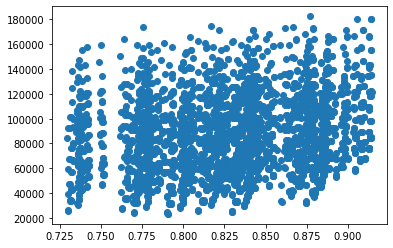

In [31]:
plt.scatter(df["MAU (Weighted Sum)"], df["Total Vehicle Cost"])

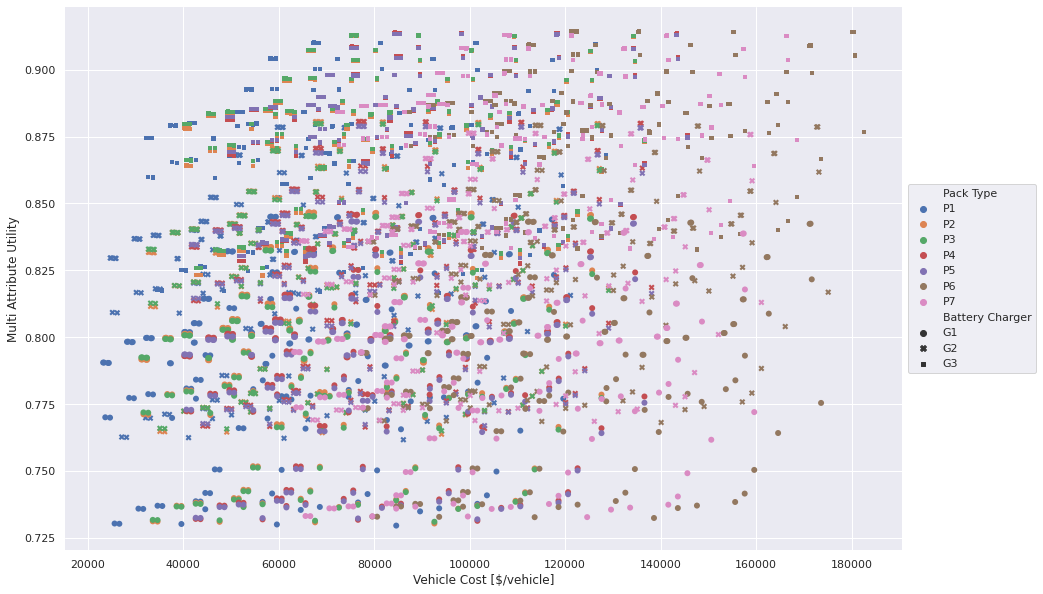

In [138]:
# plot using sns
sns.set_theme(style="darkgrid")
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
g = sns.scatterplot(x="Vehicle Cost [$/vehicle]", y="Multi Attribute Utility",
                hue="Pack Type", style="Battery Charger",
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="brief",
                data=df, ax=ax)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

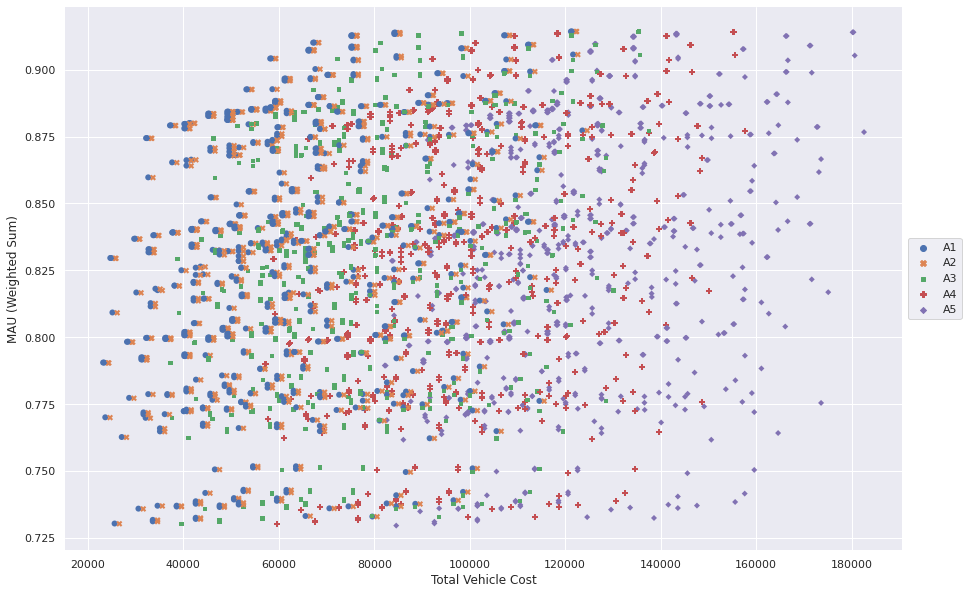

In [60]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
g = sns.scatterplot(x="Total Vehicle Cost", y="MAU (Weighted Sum)",
                hue="Autonomy Level", style="Autonomy Level",
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="auto",
                data=df, ax=ax)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

In [133]:

sns.relplot(
    data=df, x="Total Vehicle Cost", y="MAU (Weighted Sum)",
    row="Autonomy Level", hue="Chassis",
    kind="scatter"
)

ValueError: Could not interpret value `Total Vehicle Cost` for parameter `x`

# Filtering data by requirements

Plan:
1. For task 3, create a subset that contains level 3 and above of autonomy. Plot the tradespace. 
2. For task 4, create a subset that contains autonomy level 4 and above. Plot the tradespace
3. For task 5, create a subset that contains autonomy level 5 and above. Plot the tradespace

In [139]:
df_lvl0 = df[(df['C1']==1) & (df['C2']==1) &\
             (df["R1"]==1) & (df['R2']==1) &\
             (df["R3"]==1) & (df['R4']==1) &\
             (df["R5"]==1) & (df['R6']==1)]

In [140]:
df_lvl0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 100 to 2879
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Design ID                 192 non-null    object 
 1   Pack Type                 192 non-null    object 
 2   Chassis                   192 non-null    object 
 3   Battery Charger           192 non-null    object 
 4   Motor & Inverter          192 non-null    object 
 5   Autonomy Level            192 non-null    object 
 6   C1                        192 non-null    int64  
 7   C2                        192 non-null    int64  
 8   R1                        192 non-null    int64  
 9   R2                        192 non-null    int64  
 10  R3                        192 non-null    int64  
 11  R4                        192 non-null    int64  
 12  R5                        192 non-null    int64  
 13  R6                        192 non-null    int64  
 14  R7     

In [142]:
df_lvl0

,Design ID,Pack Type,Chassis,Battery Charger,Motor & Inverter,Autonomy Level,C1,C2,R1,R2,...,R4,R5,R6,R7,R8,R9,R10,R11,Vehicle Cost [$/vehicle],Multi Attribute Utility
100,D101,P1,C2,G3,M1,A1,1,1,1,1,...,1,1,1,0,0,0,0,0,37200,0.879179
101,D102,P1,C2,G3,M1,A2,1,1,1,1,...,1,1,1,0,0,0,0,0,38200,0.879091
102,D103,P1,C2,G3,M1,A3,1,1,1,1,...,1,1,1,0,1,0,0,0,51200,0.878989
103,D104,P1,C2,G3,M1,A4,1,1,1,1,...,1,1,1,0,1,1,0,0,71200,0.878796
104,D105,P1,C2,G3,M1,A5,1,1,1,1,...,1,1,1,0,1,1,1,0,96200,0.878350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,D2876,P6,C8,G3,M4,A1,1,1,1,1,...,1,1,1,1,0,0,0,0,123600,0.877296
2876,D2877,P6,C8,G3,M4,A2,1,1,1,1,...,1,1,1,1,0,0,0,0,124600,0.877243
2877,D2878,P6,C8,G3,M4,A3,1,1,1,1,...,1,1,1,1,1,0,0,0,137600,0.877159
2878,D2879,P6,C8,G3,M4,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,157600,0.877010


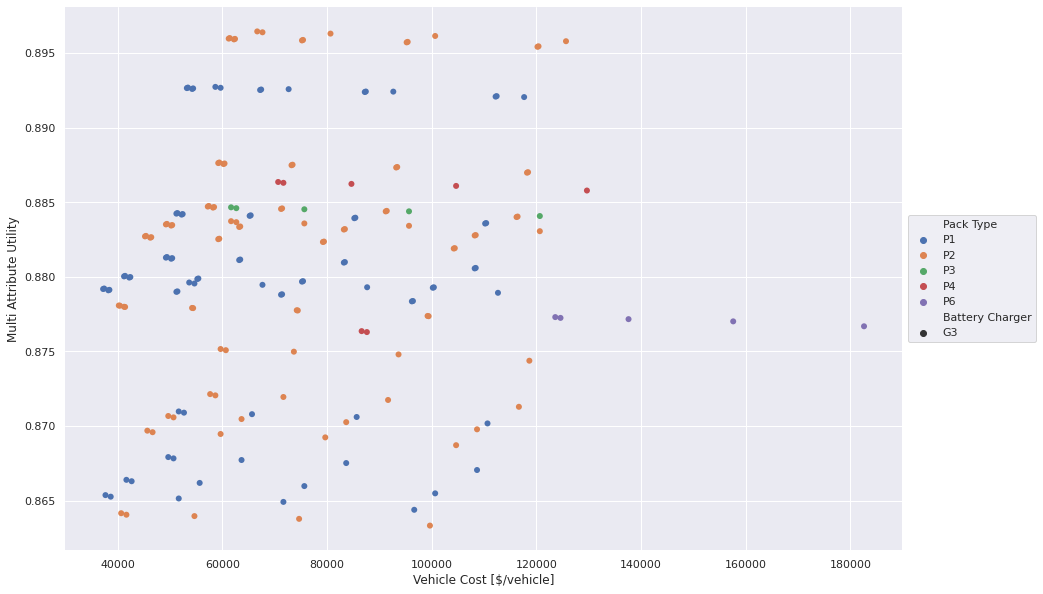

In [141]:
# plot using sns
sns.set_theme(style="darkgrid")
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
g = sns.scatterplot(x="Vehicle Cost [$/vehicle]", y="Multi Attribute Utility",
                hue="Pack Type", style="Battery Charger",
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="brief",
                data=df_lvl0, ax=ax)
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

In [102]:
# task 3
#filter the df to contain only lvl 3 autonomy or above
df_lvl3 = df[(df['C1']==1) & (df['C2']==1) &\
             (df["R1"]==1) & (df['R2']==1) &\
             (df["R3"]==1) & (df['R4']==1) &\
             (df["R5"]==1) & (df['R6']==1) &\
             (df["R7"]==1) & (df['R8']==1)]




In [ ]:
""" and (df["R1"]==1) \
             and (df["R2"]==1) and (df["R3"]==1) and (df["R4"]==1)\
             and (df["R5"]==1) and (df["R6"]==1) \
             and (df["R7"]==1) and (df["R8"]==1)]"""

In [123]:
df_lvl3

,Design ID,Pack Type,Chassis,Battery Charger,Motor & Inverter,Autonomy Level,C1,C2,R1,R2,...,R4,R5,R6,R7,R8,R9,R10,R11,Vehicle Cost [$/vehicle],Multi Attribute Utility
342,D343,P1,C6,G3,M1,A3,1,1,1,1,...,1,1,1,1,1,0,0,0,67200,0.892515
343,D344,P1,C6,G3,M1,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,87200,0.892381
344,D345,P1,C6,G3,M1,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112200,0.892074
347,D348,P1,C6,G3,M2,A3,1,1,1,1,...,1,1,1,1,1,0,0,0,67400,0.892550
348,D349,P1,C6,G3,M2,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,87400,0.892414
349,D350,P1,C6,G3,M2,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112400,0.892105
352,D353,P1,C6,G3,M3,A3,1,1,1,1,...,1,1,1,1,1,0,0,0,67650,0.879459
353,D354,P1,C6,G3,M3,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,87650,0.879296
354,D355,P1,C6,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112650,0.878924
412,D413,P1,C7,G3,M3,A3,1,1,1,1,...,1,1,1,1,1,0,0,0,72650,0.892572


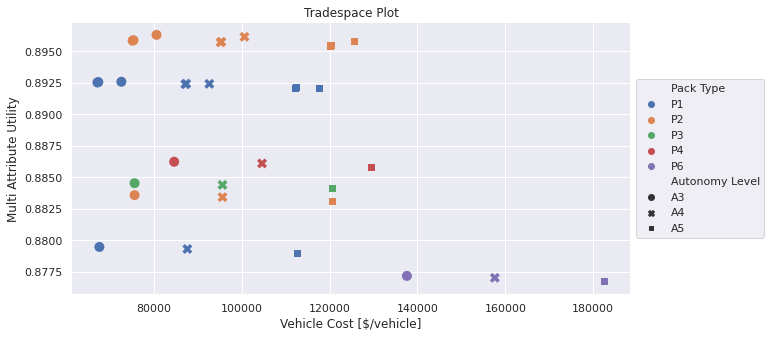

In [122]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="Vehicle Cost [$/vehicle]", y="Multi Attribute Utility",
                hue="Pack Type", style="Autonomy Level", s=100,
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="auto",
                data=df_lvl3, ax=ax)
g.set_title("Tradespace Plot")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

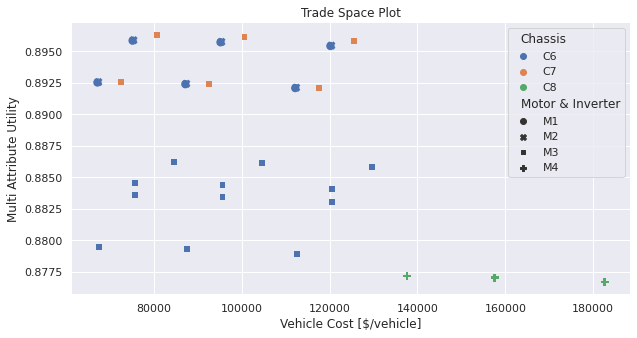

In [113]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="Vehicle Cost [$/vehicle]", y="Multi Attribute Utility",
                hue="Chassis", style="Motor & Inverter", s=70,
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="auto",
                data=df_lvl3, ax=ax).set_title("Trade Space Plot")
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

In [124]:
df_lvl4 = df_lvl3[df_lvl3['R9']==1]

In [131]:
df_lvl4

,Design ID,Pack Type,Chassis,Battery Charger,Motor & Inverter,Autonomy Level,C1,C2,R1,R2,...,R4,R5,R6,R7,R8,R9,R10,R11,Vehicle Cost [$/vehicle],Multi Attribute Utility
343,D344,P1,C6,G3,M1,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,87200,0.892381
344,D345,P1,C6,G3,M1,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112200,0.892074
348,D349,P1,C6,G3,M2,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,87400,0.892414
349,D350,P1,C6,G3,M2,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112400,0.892105
353,D354,P1,C6,G3,M3,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,87650,0.879296
354,D355,P1,C6,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112650,0.878924
413,D414,P1,C7,G3,M3,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,92650,0.892407
414,D415,P1,C7,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,117650,0.892042
823,D824,P2,C6,G3,M1,A4,1,1,1,1,...,1,1,1,1,1,1,0,0,95200,0.895708
824,D825,P2,C6,G3,M1,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,120200,0.895412


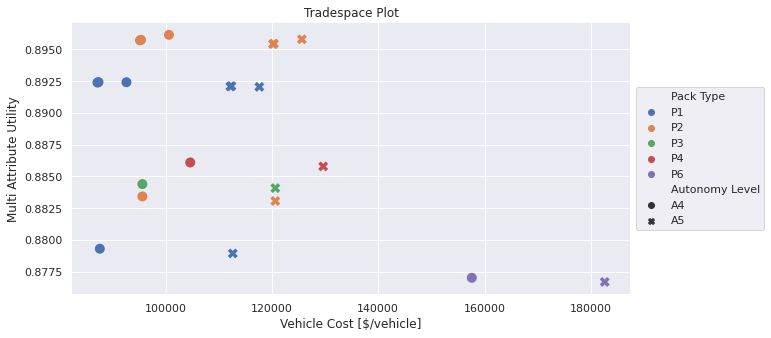

In [125]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="Vehicle Cost [$/vehicle]", y="Multi Attribute Utility",
                hue="Pack Type", style="Autonomy Level", s=100,
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="auto",
                data=df_lvl4, ax=ax)
g.set_title("Tradespace Plot")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [128]:
df_lvl5 = df_lvl4[df_lvl4['R10']==1]

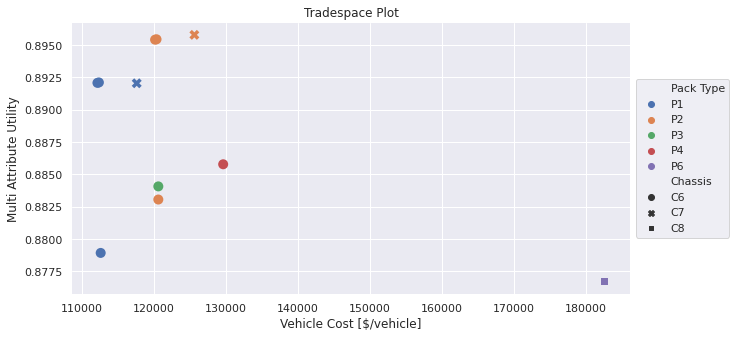

In [143]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="Vehicle Cost [$/vehicle]", y="Multi Attribute Utility",
                hue="Pack Type", style="Chassis", s=100,
                #palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                legend="auto",
                data=df_lvl5, ax=ax)
g.set_title("Tradespace Plot")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [130]:
df_lvl5

,Design ID,Pack Type,Chassis,Battery Charger,Motor & Inverter,Autonomy Level,C1,C2,R1,R2,...,R4,R5,R6,R7,R8,R9,R10,R11,Vehicle Cost [$/vehicle],Multi Attribute Utility
344,D345,P1,C6,G3,M1,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112200,0.892074
349,D350,P1,C6,G3,M2,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112400,0.892105
354,D355,P1,C6,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,112650,0.878924
414,D415,P1,C7,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,117650,0.892042
824,D825,P2,C6,G3,M1,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,120200,0.895412
829,D830,P2,C6,G3,M2,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,120400,0.895443
834,D835,P2,C6,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,120650,0.883054
894,D895,P2,C7,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,125650,0.895786
1314,D1315,P3,C6,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,120650,0.884069
1794,D1795,P4,C6,G3,M3,A5,1,1,1,1,...,1,1,1,1,1,1,1,1,129650,0.885779


# Task: build graphs for df attributes against cost